# INITIAL EDA AND DATA CLEANING. 



In [13]:
## Importations
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
## Load datasets
train = pd.read_csv("../data/raw/train.csv", 
                   index_col=["date"], parse_dates=True)
test = pd.read_csv("../data/raw/test.csv", 
                   index_col=["date"], parse_dates=True)

holiday_events = pd.read_csv("../data/raw/holiday_events.csv", 
                    index_col=["date"], parse_dates=True, 
                    date_format="%Y-%m-%d")
holiday_events = holiday_events.drop(columns=holiday_events.columns[0])

oil = pd.read_csv("../data/raw/oil.csv", 
                    index_col=["date"], parse_dates=True, 
                    date_format="%Y-%m-%d" )
oil = oil.drop(columns=oil.columns[0])

stores = pd.read_csv("../data/raw/stores.csv", index_col=0)
sample_submission = pd.read_csv("../data/raw/sample_submission.csv")
transactions = pd.read_csv("../data/raw/transactions.csv")

In [5]:
## inspect surface properties of train, compare with metadata 

train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [36]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [40]:
train.shape

(3000888, 5)

In [38]:
## check data content quality: missing values

train.isnull().sum() # no missing values

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [39]:
train.nunique() # there about 1800 series 

id             3000888
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [40]:
54 * 33

1782

There about 1800 series in the data. each sales series is uniquely described by `store_nbr` and  `family`

In [17]:
train.duplicated().sum() # no duplicates

0

In [31]:
train.set_index(["store_nbr", "family"], append=True)

id     sales  \
date       store_nbr family                                          
2013-01-01 1         AUTOMOTIVE                        0     0.000   
                     BABY CARE                         1     0.000   
                     BEAUTY                            2     0.000   
                     BEVERAGES                         3     0.000   
                     BOOKS                             4     0.000   
...                                                  ...       ...   
2017-08-15 9         POULTRY                     3000883   438.133   
                     PREPARED FOODS              3000884   154.553   
                     PRODUCE                     3000885  2419.729   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000   
                     SEAFOOD                     3000887    16.000   

                                                 onpromotion  
date       store_nbr family                                   
2013-01-01 1         AUTOMOTIVE                            0  
                     BABY CARE                             0  
                     BEAUTY                                0  
                     BEVERAGES                             0  
                     BOOKS                                 0  
...                                                      ...  
2017-08-15 9         POULTRY                               0  
                     PREPARED FOODS                        1  
                     PRODUCE                             148  
                     SCHOOL AND OFFICE SUPPLIES            8  
                     SEAFOOD                               0  

[3000888 rows x 3 columns]

In [35]:
## inspect surface properties; compare with metadata
test 

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0
...,...,...,...,...
2017-08-31,3029395,9,POULTRY,1
2017-08-31,3029396,9,PREPARED FOODS,0
2017-08-31,3029397,9,PRODUCE,1


In [49]:
# dates in test data
test.groupby("date").count().index 

DatetimeIndex(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [50]:
len(test.groupby("date").count().index)  # meta data claims 15 days. 

16

In [51]:
test.shape

(28512, 4)

In [52]:
test.isnull().sum()

id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [53]:
holiday_events

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [73]:
type(oil.index)

pandas.core.indexes.base.Index

In [74]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.139999
2013-01-03,92.970001
2013-01-04,93.120003
2013-01-07,93.199997


In [94]:
holiday_events.shape

(350, 5)

In [85]:
holiday_events.drop(columns=holiday_events.columns[0], axis=1)

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [95]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2012-03-02 to 2017-12-26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         350 non-null    object
 1   locale       350 non-null    object
 2   locale_name  350 non-null    object
 3   description  350 non-null    object
 4   transferred  350 non-null    bool  
dtypes: bool(1), object(4)
memory usage: 14.0+ KB


In [7]:
holiday_events.columns

Index(['type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [96]:
holiday_events.isna().sum()

type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [99]:
holiday_events.loc["2012-10"]

,type,locale,locale_name,description,transferred
date,,,,,
2012-10-07,Holiday,Local,Quevedo,Cantonizacion de Quevedo,False
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False


In [101]:
holiday_events.query("type=='Bridge'")

,type,locale,locale_name,description,transferred
date,,,,,
2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


In [102]:
oil.shape

(1218, 1)

In [8]:
oil.columns

Index(['dcoilwtico'], dtype='object')

In [103]:
oil.isna().sum()

dcoilwtico    43
dtype: int64

In [104]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [15]:
oil.isna().sum() / len(oil) # % of missing values

dcoilwtico    0.035304
dtype: float64

In [36]:
oil.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='date', length=1218, freq=None)

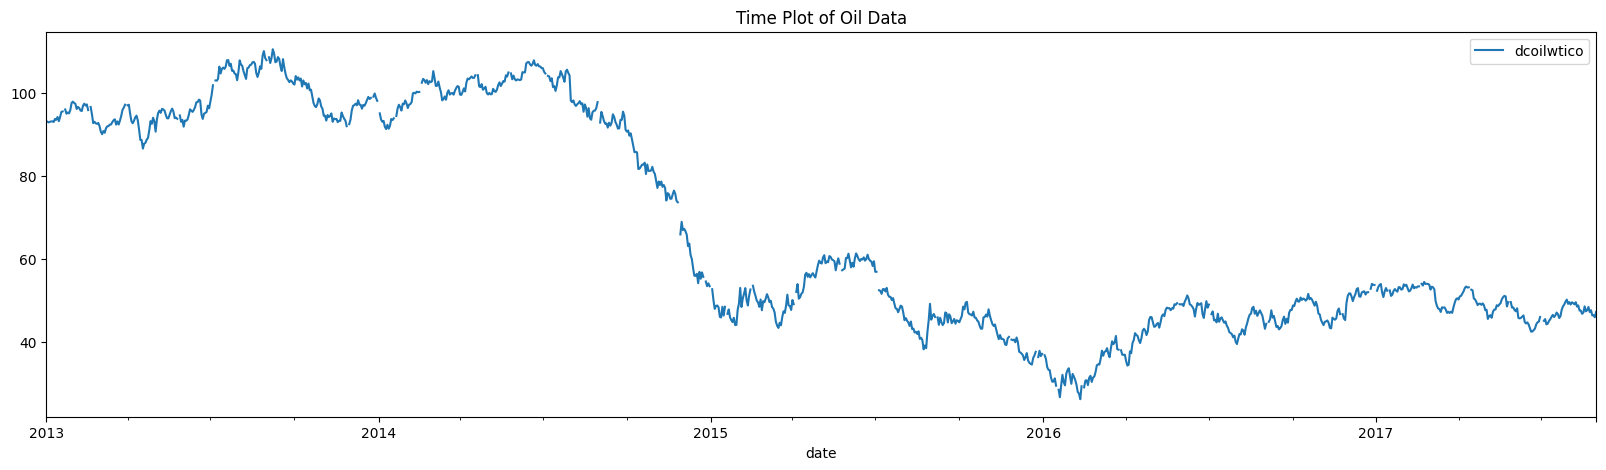

In [39]:
oil.plot(figsize=(20, 5))
plt.title("Time Plot of Oil Data");

In [106]:
stores.shape

(54, 5)

In [107]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.5+ KB


In [9]:
stores.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [108]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [109]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [111]:
transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [10]:
transactions.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

# DATA CLEANING

In [25]:
new_oil = oil.copy()  # data selection: make a copy of oil before cleaning
new_oil.bfill(inplace=True) # imputing missing values with backfill method
new_oil.isna().sum() 

dcoilwtico    0
dtype: int64

In [26]:
## rename column

new_oil.rename(columns={"dcoilwtico":"oil_price"}, inplace=True)
new_oil

,oil_price
date,
2013-01-01,93.139999
2013-01-02,93.139999
2013-01-03,92.970001
2013-01-04,93.120003
2013-01-07,93.199997
...,...
2017-08-25,47.650002
2017-08-28,46.400002
2017-08-29,46.459999


In [35]:
## save clean oil data for next step
new_oil.to_csv("../data/processed/01_oil_further_analysis.csv")